# Goals
* Predict Results of Pro matches with 70% accuracy

### Data that will be used
* match data and maps

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('scrapy/vlrgg/playerData/vlr.csv')

In [3]:
data

,playerName,playerTeam,map,playerAgent,playerKills,playerDeaths,playerAssists,playerACS,playerADR,playerHS,...,playerFirstDeath,matchID,gameID,opponent,result,winnerRoundsWon,loserRoundsWon,winningTeam,date,event
0,stax,VS,Haven,breach,22.0,11.0,5.0,262.0,157.0,53%,...,2.0,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,01-12-21,VALORANT Champions
1,Rb,VS,Haven,skye,13.0,10.0,7.0,212.0,158.0,33%,...,2.0,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,01-12-21,VALORANT Champions
2,k1Ng,VS,Haven,killjoy,13.0,13.0,3.0,212.0,158.0,24%,...,2.0,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,01-12-21,VALORANT Champions
3,MaKo,VS,Haven,astra,13.0,8.0,6.0,209.0,154.0,24%,...,1.0,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,01-12-21,VALORANT Champions
4,BuZz,VS,Haven,jett,14.0,12.0,6.0,206.0,152.0,38%,...,1.0,VSvsFS01-12-21,VSvsFS01-12-21Haven,FS,Win,13,5,VS,01-12-21,VALORANT Champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140351,Leo,GUILD,Split,sage,25.0,14.0,8.0,336.0,227.0,20%,...,0.0,SMBvsGUILD11-10-21,SMBvsGUILD11-10-21Split,SMB,Win,13,8,GUILD,11-10-21,Champions Tour EMEA: Last Chance Qualifier
140352,draken,GUILD,Split,cypher,22.0,14.0,4.0,282.0,174.0,19%,...,4.0,SMBvsGUILD11-10-21,SMBvsGUILD11-10-21Split,SMB,Win,13,8,GUILD,11-10-21,Champions Tour EMEA: Last Chance Qualifier
140353,Sayf,GUILD,Split,skye,18.0,10.0,7.0,214.0,139.0,21%,...,1.0,SMBvsGUILD11-10-21,SMBvsGUILD11-10-21Split,SMB,Win,13,8,GUILD,11-10-21,Champions Tour EMEA: Last Chance Qualifier
140354,Yacine,GUILD,Split,raze,11.0,18.0,5.0,166.0,100.0,12%,...,3.0,SMBvsGUILD11-10-21,SMBvsGUILD11-10-21Split,SMB,Win,13,8,GUILD,11-10-21,Champions Tour EMEA: Last Chance Qualifier


# Creating the baseline model
Using logistic regression to predict wins (for the first iteration)

Inputs for this model will include:
* 5 Players on team
* 5 Players on opponent team
* Agents each player is on
* Map

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

csv_data = pd.read_csv('refined.csv')
used_columns = csv_data.columns.tolist()
used_columns.remove('date')
used_columns.remove('result')
used_columns.remove('Unnamed: 0')

X_data = pd.get_dummies(csv_data[used_columns]).to_numpy()
y_data = pd.get_dummies(csv_data['result'])['Win'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=69)

clf = LogisticRegression(penalty="none")
clf.fit(X_train, y_train)



LogisticRegression(penalty='none')

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(accuracy_score(y_pred=y_pred, y_true=y_test))

[[ 834  607]
 [ 534 1481]]
0.6698495370370371


Initial model gives a subpar baseline of 65-70% accuracy, but this purely uses categorical data. More data could be considered such as
* Player's kda moving average from the past 5 games (if information is available)
* disregard the player names
* Twitter sentiment before the game starts (graph this correlation first)

This will introduce more numerical data in here, which can be graphed, making it easier to see correlations.
Also using a moving average to adjust for the fact that the game is constantly being updated and metas are changing.

# Another iteration of Logistic Regression
This time more numbers will be used rather than just purely using categorical data

newData contains the 5 game moving average for numerical data, such as kda, first blood, first death, and headshot percentage.

In [16]:
newData = pd.read_csv('movingAverage2.csv').dropna()
newData

,Unnamed: 0,playerName,playerTeam,map,playerAgent,playerKills,playerDeaths,playerAssists,playerACS,playerADR,...,playerFirstDeath,matchID,gameID,opponent,result,winnerRoundsWon,loserRoundsWon,winningTeam,date,event
16,113540,0PZ,TRY,Bind,astra,11.7,16.8,3.3,179.9,117.6,...,3.3,TRYvsBUYH20-07-21,TRYvsBUYH20-07-21Bind,BUYH,Lose,13,3,BUYH,2021-07-20,Champions Tour CIS Stage 3: Challengers 2
41,40934,0uate,AE,Bind,sova,10.0,13.4,6.7,163.4,113.8,...,1.7,TIvsAE25-02-21,TIvsAE25-02-21Bind,TI,Lose,13,8,TI,2021-02-25,Champions Tour North America Stage 1: Challeng...
42,81570,0uate,AE,Icebox,killjoy,11.0,13.5,7.1,177.2,120.8,...,1.6,V1vsAE01-04-21,V1vsAE01-04-21Icebox,V1,Lose,13,9,V1,2021-04-01,Champions Tour North America Stage 2: Challeng...
43,81870,0uate,AE,Haven,sova,11.7,13.9,7.1,180.1,123.0,...,1.6,V1vsAE01-04-21,V1vsAE01-04-21Haven,V1,Lose,13,9,V1,2021-04-01,Champions Tour North America Stage 2: Challeng...
44,85591,0uate,AE,Ascent,sova,11.7,14.8,7.2,179.9,115.5,...,1.7,AEvsVANC01-04-21,AEvsVANC01-04-21Ascent,VANC,Win,13,3,AE,2021-04-01,Champions Tour North America Stage 2: Challeng...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138000,32270,게노리,XD,Haven,reyna,13.9,15.3,3.7,215.2,133.6,...,2.0,XDvsYZ04-02-21,XDvsYZ04-02-21Haven,YZ,Lose,13,1,YZ,2021-02-04,Champions Tour Europe Stage 1: Challengers 1
138027,133141,여 누,TAIL,Ascent,killjoy,11.2,15.0,5.9,176.6,115.7,...,1.8,MANvsTAIL03-07-21,MANvsTAIL03-07-21Ascent,MAN,Win,13,7,TAIL,2021-07-03,Champions Tour Korea Stage 3: Challengers
138028,133124,여 누,TAIL,Ascent,breach,11.9,14.6,5.5,178.3,113.0,...,2.0,GMGvsTAIL03-07-21,GMGvsTAIL03-07-21Ascent,GMG,Lose,13,2,GMG,2021-07-03,Champions Tour Korea Stage 3: Challengers
138029,133177,여 누,TAIL,Breeze,skye,11.4,14.4,5.2,171.8,108.2,...,2.1,GMGvsTAIL03-07-21,GMGvsTAIL03-07-21Breeze,GMG,Lose,13,3,GMG,2021-07-03,Champions Tour Korea Stage 3: Challengers


#### Visualization of data

Graph of team average kill death ratio and win rate

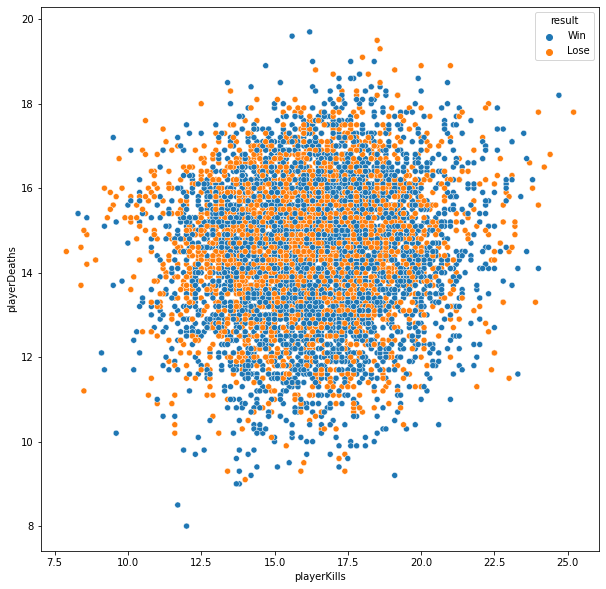

In [17]:
plt.figure(figsize=(10,10))
plot = sns.scatterplot(data=newData[newData['playerAgent']=='raze'], x="playerKills", y='playerDeaths', hue="result")


It does seem like players with higher kda's win more often, but this metric has quite a bit of noise in it. This makes sense since controller and sentinel agents can have high impact in a match without getting kills. Additionally, rather than just having individual performance, we will sum the team performance for each map.

Regardless, the graph does signal that this is a promising metric to use for the next model.

In [18]:
used_cols = ['playerTeam', 'matchID', 'map', 'playerKills', 'playerDeaths', 'playerAssists', 'playerACS', 'playerADR', 'playerHS', 'playerFirstBlood', 'playerFirstDeath', 'result']
num_cols = ['playerKills', 'playerDeaths', 'playerAssists', 'playerACS', 'playerADR', 'playerHS', 'playerFirstBlood', 'playerFirstDeath']
teamAVG = pd.DataFrame()
teamAVG = newData.copy()
teamAVG[num_cols] = teamAVG.groupby(['matchID', 'map', 'playerTeam', 'result'])[num_cols].transform('sum')
teamAVG = teamAVG.drop(['playerName', 'Unnamed: 0', 'playerAgent'], 1).drop_duplicates()
#dataframe has summation of individual player 5 game rolling averages



<AxesSubplot:xlabel='playerKills', ylabel='playerDeaths'>

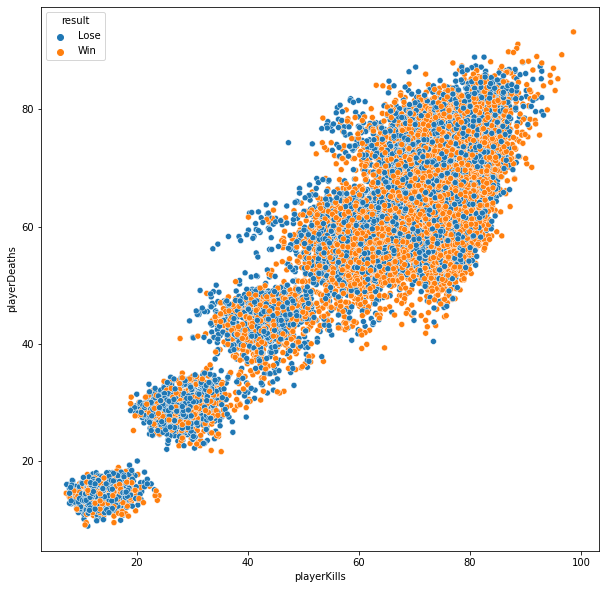

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=teamAVG, x='playerKills', y='playerDeaths', hue='result')
#graph of team 5 game rolling average kills and deaths

### Adding team data into the new model
Unsurprisingly how well the team does as a whole has more impact on a game than any individual player can (even if they are a duelist)

This signals that our model should still take into account every players performance within the team and could possibly use total team k/d ratio as a parameter.

In [21]:
#code here is super inefficient but couldn't find a better option at the time
#can skip if have goodData.csv
modelData = teamAVG.copy()
matches = modelData['matchID'].unique()
newDf = pd.DataFrame()
for match in matches:
    mapNames = modelData[modelData['matchID']==match]['map'].unique()
    for mapName in mapNames:
        teams = modelData[(modelData['matchID']==match)&(modelData['map']==mapName)]['playerTeam'].unique()
        if len(teams)!=2:
            continue
        matchData = modelData[(modelData['matchID']==match)&(modelData['map']==mapName)]
        team1 = matchData[matchData['playerTeam']==teams[0]]
        team2 = matchData[matchData['playerTeam']==teams[1]]
        tempdict = {
           'playerTeam': team1['playerTeam'].values[0],
           'map': team1['map'].values[0],
           'playerKills': team1['playerKills'].values[0],
           'playerDeaths': team1['playerDeaths'].values[0],
           'playerAssists': team1['playerAssists'].values[0],
           'playerACS': team1['playerACS'].values[0],
           'playerHS': team1['playerHS'].values[0],
           'playerADR': team1['playerADR'].values[0],
           'playerFirstBlood': team1['playerFirstBlood'].values[0],
           'playerFirstDeath': team1['playerFirstDeath'].values[0],
           'o_playerKills': team2['playerKills'].values[0],
           'o_playerDeaths': team2['playerDeaths'].values[0],
           'o_playerAssists': team2['playerAssists'].values[0],
           'o_playerACS': team2['playerACS'].values[0],
           'o_playerHS': team2['playerHS'].values[0],
           'o_playerADR': team2['playerADR'].values[0],
           'o_playerFirstBlood': team2['playerFirstBlood'].values[0],
           'o_playerFirstDeath': team2['playerFirstDeath'].values[0],
           'o_playerTeam': team2['playerTeam'].values[0],
           'result': team1['result'].values[0]
        } 
        newDf = newDf.append(tempdict, ignore_index=True)
newDf
        


,map,o_playerACS,o_playerADR,o_playerAssists,o_playerDeaths,o_playerFirstBlood,o_playerFirstDeath,o_playerHS,o_playerKills,o_playerTeam,playerACS,playerADR,playerAssists,playerDeaths,playerFirstBlood,playerFirstDeath,playerHS,playerKills,playerTeam,result
0,Icebox,1121.1,713.6,33.1,65.1,10.4,10.3,95.2,81.2,V1,625.9,407.8,14.2,40.5,6.4,5.2,62.8,41.1,AE,Lose
1,Haven,1108.4,708.0,33.6,67.0,10.8,10.2,93.2,81.4,V1,654.3,428.1,15.2,41.6,6.7,5.6,63.4,44.2,AE,Lose
2,Ascent,214.2,140.8,5.1,15.2,3.0,2.2,22.6,15.6,VANC,648.2,422.5,14.6,43.2,7.0,6.3,65.9,44.5,AE,Win
3,Breeze,971.2,631.5,19.2,59.7,10.7,10.6,130.9,64.1,GHOST,179.9,113.0,7.3,14.1,1.7,1.3,19.1,11.4,FH,Lose
4,Haven,1014.9,651.1,19.0,57.1,10.8,10.2,138.0,66.5,GHOST,183.9,116.3,7.4,13.8,1.8,1.4,20.5,11.7,FH,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,Ascent,241.2,150.2,4.3,14.4,2.8,2.4,21.0,17.9,HK,396.7,254.1,9.3,28.3,3.1,3.4,61.2,29.9,OUTR,Win
8135,Bind,191.9,118.5,3.8,15.1,2.6,3.9,15.2,12.9,ILLM,190.3,127.6,4.2,13.9,1.3,2.3,28.8,12.2,PS,Win
8136,Bind,309.4,200.0,4.6,14.1,3.9,2.0,20.7,24.0,EXILE,180.4,118.4,5.9,14.4,1.4,2.8,23.7,11.9,INFS,Lose
8137,Ascent,311.0,199.3,3.7,13.3,3.8,1.7,21.0,23.7,EXILE,184.5,117.1,5.9,14.7,1.1,2.6,24.0,12.0,INFS,Lose


In [37]:
newDf = pd.read_csv('goodData2.csv')
newDf['kdRatio'] = newDf.apply(lambda x: x['playerKills']/x['playerDeaths'], axis=1)
newDf['o_kdRatio'] = newDf.apply(lambda x: x['o_playerKills']/x['o_playerDeaths'], axis=1)


In [38]:
#getting the data ready for model
newDf = newDf.dropna()
num_cols = [ 'playerACS', 'playerADR', 'o_playerACS', 'o_playerADR', 'kdRatio', 'o_kdRatio', 'playerFirstBlood', 'o_playerFirstBlood', 'playerFirstDeath', 'o_playerFirstDeath']
cat_cols = ['map', 'result', 'playerTeam', 'o_playerTeam']
modelDF = pd.DataFrame()
modelDF = pd.get_dummies(newDf[cat_cols])
modelDF[num_cols] = newDf[num_cols]
X_train, X_test, y_train, y_test = train_test_split(modelDF.drop(['result_Lose', 'result_Win'], 1), modelDF['result_Win'], random_state=133, train_size=0.75)


In [39]:
clf = LogisticRegression(random_state= 13, max_iter=10000)
clf.fit(X_train, y_train)
print(confusion_matrix(y_pred=clf.predict(X_test), y_true=y_test))
print(accuracy_score(y_pred=clf.predict(X_test), y_true=y_test))

[[596 382]
 [336 721]]
0.6471744471744472


edit: had data leakage beforehand, included the game that was played in the 10 game average

Will have to do some more data transformation in the next model, but glad to have caught that mistake now

# Combining both models together
While the last model did achieve the goal of getting 70% or higher, there are ways to improve and additional parameters we can include. This model will attempt to include the best of both models.

In [77]:
#code here is super inefficient but couldn't find a better option at the time
modelData = pd.read_csv('movingAverage.csv').drop('Unnamed: 0', 1).dropna()
matches = modelData['matchID'].unique()
newDf = pd.DataFrame()
for match in matches:
    mapNames = modelData[modelData['matchID']==match]['map'].unique()
    for mapName in mapNames:
        teams = modelData[(modelData['matchID']==match)&(modelData['map']==mapName)]['playerTeam'].unique()
        if len(teams)!=2:
            continue
        matchData = modelData[(modelData['matchID']==match)&(modelData['map']==mapName)]
        team1 = matchData[matchData['playerTeam']==teams[0]]
        team2 = matchData[matchData['playerTeam']==teams[1]]
        if len(team1)!=5 or len(team2)!=5:
            continue
        dfdict ={}
        for i in range(5):
            tempdict = {
                'player'+str(i+1)+'Kills': team1.iloc[i]['playerKills'],
                'player'+str(i+1)+'Deaths': team1.iloc[i]['playerDeaths'],
                'player'+str(i+1)+'Assists': team1.iloc[i]['playerAssists'],
                'player'+str(i+1)+'ACS': team1.iloc[i]['playerADR'],
                'player'+str(i+1)+'HS': team1.iloc[i]['playerHS'],
                'player'+str(i+1)+'FB': team1.iloc[i]['playerFirstBlood'],
                'player'+str(i+1)+'FD': team1.iloc[i]['playerFirstDeath'],
                'player'+str(i+1)+'name': team1.iloc[i]['playerName'],
                'player'+str(i+1)+'agent': team1.iloc[i]['playerAgent'],
                'o_player'+str(i+1)+'Kills': team2.iloc[i]['playerKills'],
                'o_player'+str(i+1)+'Deaths': team2.iloc[i]['playerDeaths'],
                'o_player'+str(i+1)+'Assists': team2.iloc[i]['playerAssists'],
                'o_player'+str(i+1)+'ACS': team2.iloc[i]['playerADR'],
                'o_player'+str(i+1)+'HS': team2.iloc[i]['playerHS'],
                'o_player'+str(i+1)+'FB': team2.iloc[i]['playerFirstBlood'],
                'o_player'+str(i+1)+'FD': team2.iloc[i]['playerFirstDeath'],
                'o_player'+str(i+1)+'name': team2.iloc[i]['playerName'],
                'o_player'+str(i+1)+'agent': team2.iloc[i]['playerAgent'],
                'map':team1.iloc[0]['map'],
                'result':team1.iloc[0]['result']
            }
            dfdict['matchID'] = team2.iloc[0]['matchID']
            dfdict['teamName'] = team1.iloc[0]['playerTeam']
            dfdict['o_teamName'] = team2.iloc[0]['playerTeam']
            dfdict = dfdict|tempdict
        newDf = newDf.append(dfdict, ignore_index=True)
        dfdict = {}
        for i in range(5):
            tempdict = {
                'player'+str(i+1)+'Kills': team2.iloc[i]['playerKills'],
                'player'+str(i+1)+'Deaths': team2.iloc[i]['playerDeaths'],
                'player'+str(i+1)+'Assists': team2.iloc[i]['playerAssists'],
                'player'+str(i+1)+'ACS': team2.iloc[i]['playerADR'],
                'player'+str(i+1)+'HS': team2.iloc[i]['playerHS'],
                'player'+str(i+1)+'FB': team2.iloc[i]['playerFirstBlood'],
                'player'+str(i+1)+'FD': team2.iloc[i]['playerFirstDeath'],
                'player'+str(i+1)+'agent': team2.iloc[i]['playerAgent'],
                #'player'+str(i+1)+'name': team2.iloc[i]['playerName'],
                'o_player'+str(i+1)+'Kills': team1.iloc[i]['playerKills'],
                'o_player'+str(i+1)+'Deaths': team1.iloc[i]['playerDeaths'],
                'o_player'+str(i+1)+'Assists': team1.iloc[i]['playerAssists'],
                'o_player'+str(i+1)+'ACS': team1.iloc[i]['playerADR'],
                'o_player'+str(i+1)+'HS': team1.iloc[i]['playerHS'],
                'o_player'+str(i+1)+'FB': team1.iloc[i]['playerFirstBlood'],
                'o_player'+str(i+1)+'FD': team1.iloc[i]['playerFirstDeath'],
                'o_player'+str(i+1)+'agent': team1.iloc[i]['playerAgent'],
                #'o_player'+str(i+1)+'name': team1.iloc[i]['playerName'],
                'map':team1.iloc[0]['map'],
                'result':team2.iloc[0]['result'],

            }
            dfdict['matchID'] = team2.iloc[0]['matchID']
            dfdict['teamName'] = team2.iloc[0]['playerTeam']
            dfdict['o_teamName'] = team1.iloc[0]['playerTeam']

            dfdict = dfdict|tempdict
        newDf = newDf.append(dfdict, ignore_index=True)
newDf
        


,map,matchID,o_player1ACS,o_player1Assists,o_player1Deaths,o_player1FB,o_player1FD,o_player1HS,o_player1Kills,o_player1agent,...,player5Assists,player5Deaths,player5FB,player5FD,player5HS,player5Kills,player5agent,player5name,result,teamName
0,Ascent,CREAvsORB17-07-21,86.8,3.6,15.0,0.5,1.7,22.1,9.3,omen,...,5.4,15.5,1.7,2.5,29.0,12.2,jett,Muushock,Lose,ORB
1,Ascent,CREAvsORB17-07-21,117.6,3.3,16.8,2.6,3.3,28.6,11.7,phoenix,...,3.7,16.4,2.8,3.6,14.3,10.7,jett,NaN,Win,CREA
2,Icebox,FOXvsLNG26-04-21,162.4,3.6,16.7,4.5,2.3,29.3,22.5,reyna,...,4.6,15.7,3.9,3.5,33.0,19.4,omen,zodiac,Win,FOX
3,Icebox,FOXvsLNG26-04-21,135.2,7.6,14.0,1.8,1.9,28.8,17.3,sova,...,5.3,14.4,1.8,1.4,18.4,13.0,sova,NaN,Lose,LNG
4,Split,MEGAvsWFNT02-03-21,131.7,6.0,15.0,1.9,1.5,21.8,16.4,breach,...,4.3,13.9,1.5,2.1,34.2,13.0,cypher,nAhA,Lose,MEGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875,Ascent,SHvsNO224-07-21,124.2,5.3,11.1,1.6,2.0,30.1,13.2,kayo,...,4.5,11.0,3.8,1.6,26.9,16.0,jett,NaN,Lose,NO2
8876,Bind,SHKvsNO211-07-21,163.8,5.4,14.2,2.5,1.8,23.4,19.4,raze,...,4.9,14.7,2.6,1.8,20.4,14.6,raze,prozin,Lose,SHK
8877,Bind,SHKvsNO211-07-21,122.0,5.7,12.7,1.5,1.0,26.7,13.2,skye,...,3.8,14.5,5.2,2.6,23.9,21.1,reyna,NaN,Win,NO2
8878,Icebox,SHKvsNO211-07-21,163.2,5.3,14.9,2.7,2.3,23.4,19.2,reyna,...,5.2,14.8,2.7,1.9,20.8,14.8,sage,prozin,Win,SHK


In [82]:
newDf.to_csv('indivMovingAvg.csv')

In [83]:
newDf.columns
inputDf = newDf.drop(['o_player1name', 'o_player2name', 'o_player3name', 'o_player4name', 'o_player5name','player1name', 'player2name', 'player3name', 'player4name', 'player5name', 'matchID'], axis=1)
cat_cols = ['teamName', 'o_teamName', 'map', 'result', 'player1agent', 'player2agent', 'player3agent', 'player4agent', 'player5agent', 'o_player1agent', 'o_player2agent', 'o_player3agent', 'o_player4agent', 'o_player5agent']
tempDF = pd.get_dummies(inputDf[cat_cols])
inputDf = inputDf.drop(cat_cols, axis=1)
inputDf[tempDF.columns] = tempDF
resultDf = tempDF['result_Win']
inputDf = inputDf.drop(['result_Win', 'result_Lose'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputDf, resultDf, test_size=0.25, random_state=3424)

clf = LogisticRegression(random_state=323434, max_iter=10000)
clf.fit(X_train, y_train)
print(confusion_matrix(y_pred=clf.predict(X_test), y_true=y_test))
print(accuracy_score(y_pred=clf.predict(X_test), y_true=y_test))



[[783 332]
 [314 791]]
0.709009009009009


model didn't improve by much...
I think it's time to rethink the data and possibly use a different model

Still learned quite a bit for this first try. Main takeaways are 
* pandas and numpy functions will always be faster than functions made in python
* in scrapy, include more data than you think you will need, and think about which columns and identifiers would be helpful when creating the csv files
* graphing correlations will be a helpful way of finding possible inputs for the model and can show what inputs will not be helpful
* adding more parameters isn't always going to make the model better, there needs to be a correlation first and that can best be found by visually graphing the parameters